In [ ]:
%cd drive/MyDrive/

/content/drive/MyDrive


In [ ]:
!rm -rf ABSA/

In [ ]:
!zip -r data.zip ./ABSA_old/data/

In [ ]:
!pip install emoji underthesea transformers

     |████████████████████████████████| 170 kB 4.2 MB/s 
     |████████████████████████████████| 7.5 MB 32.1 MB/s 
     |████████████████████████████████| 3.1 MB 36.8 MB/s 
     |████████████████████████████████| 235 kB 51.9 MB/s 
     |████████████████████████████████| 743 kB 43.8 MB/s 
     |████████████████████████████████| 43 kB 2.0 MB/s 
     |████████████████████████████████| 895 kB 41.0 MB/s 
     |████████████████████████████████| 596 kB 45.5 MB/s 
     |████████████████████████████████| 3.3 MB 41.7 MB/s 
     |████████████████████████████████| 59 kB 5.5 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=88356e9318482efa75e623727dac3fc52370df2be1c5383d649136372f0e44d5
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16181 sha256=0ba7062dfda29412ca73a6ad83a57e11ee0572f45785d4801fab94d8f3a59910
  Stored in direc

# Data

## FMCG

In [ ]:
%cd ABSA_FMCG

[Errno 2] No such file or directory: 'ABSA_FMCG'
/content/drive/MyDrive/ABSA


In [ ]:
from explore_data.analysis import main

class Args():
    def __init__(self, data_dir):
        self.data_dir = data_dir
args = Args(data_dir= "../data/FMCG/ver0.3/raw")

main(args)

==== Statistic ====
Number of sentences: 5000
Number of terms: 9075 12008 (also contains EOS)
{
   "price": {
      "positive": 704,
      "negative": 53,
      "neutral": 247,
      "conflict": 0,
      "None": 0
   },
   "service": {
      "positive": 152,
      "negative": 2,
      "neutral": 3,
      "conflict": 0,
      "None": 0
   },
   "general": {
      "positive": 634,
      "negative": 308,
      "neutral": 4371,
      "conflict": 33,
      "None": 0
   },
   "quality": {
      "positive": 2018,
      "negative": 103,
      "neutral": 26,
      "conflict": 29,
      "None": 0
   },
   "unclear": {
      "positive": 0,
      "negative": 0,
      "neutral": 0,
      "conflict": 0,
      "None": 787
   }
}

==== Check =====
- EOS without unclear: 0 0 (set(), 0)
- EOS with unclear: 244 767
- EOS with unclear but term has meaning: 73 90
- Terms with unclear: 12 13 20 {'f7', 'f1', 'f101', 'f158', 'f2', 'f4', 'f6', 'f18', 'f150', 'f143', 'f14', 'f172'}
Unannotated: 188 281

==== ER

In [ ]:
#get term
!python3 explore_data/get_all_terms.py --data_dir ../data/FMCG/ver0.3/raw/ --domain FMCG

../data/FMCG/ver0.3/raw/no15/f150.ann 5100


In [ ]:
!python3 explore_data/clean_data.py --raw_folder ../data/FMCG/ver0.3/raw/ --save_file ../data/FMCG/ver0.3/clean_data_wseg.json --max_term_per_sent 20 --wseg

Number of distinct terms before cleaning: 9075
Number of distinct terms after cleaning: 8923
Number of sentences before cleaning: 5000
Number of sentences after cleaning: 4715
Number of unrelated and unannotated sentences: 281
Number of sentences that contain more than 20 terms: 4


Number of documents: 250
Number of sentences: 4715
Number of distinct terms: 8159
Average 1.7304347826086957


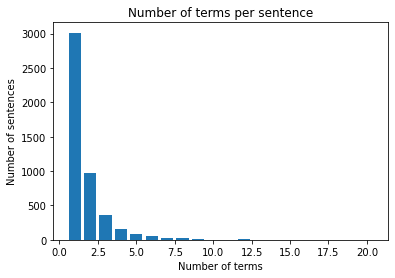

In [ ]:
import json
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

with open("../data/FMCG/ver0.3/clean_data_wseg20.json", "r") as f:
    data = json.load(f)
print("Number of documents:",len(data))
print("Number of sentences:", sum([len(data[doc_id]) for doc_id in data]))

term_per_sent = []
all_distinct_term = 0
for doc_id in data:
    for sentence in data[doc_id]:
        term_per_sent.append(len(sentence['terms']))
        all_distinct_term += len(sentence['terms'])
        if len(sentence['terms']) > 20:
            attributes = set()
            for term_id in sentence['terms']:
                for attr in sentence['terms'][term_id]['attribute']:
                    attributes.add(attr[1])
            print(sentence)
            print(attributes)
            print(doc_id)

print("Number of distinct terms:", all_distinct_term)
average_terms_per_sent = np.mean(term_per_sent)
print("Average", average_terms_per_sent)
term_per_sent = Counter(term_per_sent)
plt.bar(term_per_sent.keys(), term_per_sent.values())
plt.title("Number of terms per sentence")
plt.xlabel("Number of terms")
plt.ylabel("Number of sentences")
plt.show()

## F&B

In [ ]:
%cd ./ABSA_FandB/

[Errno 2] No such file or directory: './ABSA_FandB/'
/content/drive/MyDrive/ABSA


In [ ]:
from explore_data.analysis import main

class Args():
    def __init__(self, data_dir):
        self.data_dir = data_dir
args = Args(data_dir= "../data/FandB/ver0.1/raw")

main(args)

==== Statistic ====
Number of sentences: 5000
Number of terms: 12368 15021 (also contains EOS)
{
   "price": {
      "positive": 414,
      "negative": 49,
      "neutral": 659,
      "conflict": 1,
      "None": 0
   },
   "service": {
      "positive": 65,
      "negative": 9,
      "neutral": 11,
      "conflict": 0,
      "None": 0
   },
   "general": {
      "positive": 946,
      "negative": 219,
      "neutral": 6295,
      "conflict": 17,
      "None": 0
   },
   "quality": {
      "positive": 3945,
      "negative": 93,
      "neutral": 37,
      "conflict": 14,
      "None": 0
   },
   "location": {
      "positive": 7,
      "negative": 3,
      "neutral": 167,
      "conflict": 0,
      "None": 0
   },
   "ambience": {
      "positive": 97,
      "negative": 5,
      "neutral": 11,
      "conflict": 1,
      "None": 0
   },
   "unclear": {
      "positive": 0,
      "negative": 0,
      "neutral": 0,
      "conflict": 0,
      "None": 18
   }
}

==== Check =====
- EOS witho

In [ ]:
from explore_data.clean_data import main as clean_data

class Args():
    def __init__(self, raw_folder, save_file, max_term_per_sent, wseg, rm_eos_unclear):
        self.raw_folder = raw_folder
        self.save_file = save_file
        self.max_term_per_sent = max_term_per_sent
        self.wseg = wseg
        self.rm_eos_unclear = False


args = Args(raw_folder= "../data/FandB/ver0.1/raw/", save_file = "../data/FandB/ver0.1/clean_data_wseg.json", max_term_per_sent= 20, wseg= True, rm_eos_unclear= False)
clean_data(args)

# !python3 explore_data/clean_data.py --raw_folder ../data/FandB/ver0.0/raw/ --save_file ../data/FandB/ver0.0/clean_data_wseg.json --max_term_per_sent 50 --wseg

Các sản phẩm hiện có của bên em bao gồm : - Gà giòn giòn : 22 k / suất - Đùi gà phần tư : 32 k / đùi - Cánh gà tẩm ướp : 22 k / suất - Đùi tỏi gà tẩm ướp : 22 k / suất - Ức gà : 17 k / suất - Xúc xích Veal : 10 k / c - Bò viên ( que ) : 7 k / que - Nuggest cá ( que ) : 14 k / que - Cá viên ( que ) : 7 k / que - Chả giò ky ( que ) : 15 k / que - Bánh mì cay Hải Phòng : 4 k / c - Bánh mì pa tê : 8 k / c - Bánh mì trứng : 10 k / c - Bánh mì xúc xích : 12 k / c - Bánh mì pa tê trứng : 12 k / c - Bánh mì pa tê xúc xích : 15 k / c - Bánh mì chả giò ky : 17 k / c - Bánh mì trứng xúc xích : 17 k / c - Bánh mì gà : 15 k / c - Bánh mì gà đặc biệt : 18 k / c * Đặc sản Hải Phòng : - Chả cá : 15 k / lạng - Chả mực : 25 k / lạng Cám ơn các bác luôn ủng hộ bọn em trong suốt thời gian wa : ) .
ANH THƯ FOOD - Chuyên sỉ các món ăn vặt , xiên que : Cá viên , bò viên , tôm viên , xúc xích xông khói , hồ lô thịt viên , phô mai que , chả cá tẩm cốm xanh , viên hải sản nhân sốt mayonnaise tẩm bột , khoai tây

Number of documents: 250
Number of sentences: 4827
Number of distinct terms: 11498
Average 2.38201781644914


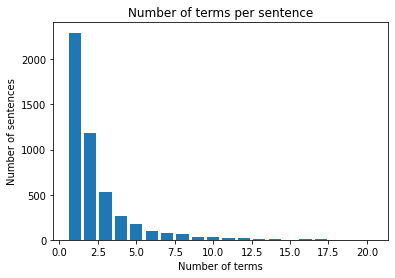

In [ ]:
import json
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

with open("../data/FandB/ver0.1/clean_data_wseg20.json", "r") as f:
    data = json.load(f)
print("Number of documents:",len(data))
print("Number of sentences:", sum([len(data[doc_id]) for doc_id in data]))

term_per_sent = []
all_distinct_term = 0
for doc_id in data:
    for sentence in data[doc_id]:
        term_per_sent.append(len(sentence['terms']))
        all_distinct_term += len(sentence['terms'])
        if len(sentence['terms']) > 20:
            attributes = set()
            for term_id in sentence['terms']:
                for attr in sentence['terms'][term_id]['attribute']:
                    attributes.add(attr[1])
            print(sentence)
            print(attributes)
            print(doc_id)

print("Number of distinct terms:", all_distinct_term)
average_terms_per_sent = np.mean(term_per_sent)
print("Average", average_terms_per_sent)
term_per_sent = Counter(term_per_sent)
plt.bar(term_per_sent.keys(), term_per_sent.values())
plt.title("Number of terms per sentence")
plt.xlabel("Number of terms")
plt.ylabel("Number of sentences")
plt.show()

# Train, dev, test analysis


## TBSA

### FMCG

In [ ]:
!python3 loader/split_data_tbsa.py --data_file ../data/FMCG/ver0.3/clean_data_wseg20.json --save_folder ../data/FMCG/ver0.3/split/TBSA/

Term with no attribute: 0
All sentences: 4715
Train: 3771 || Dev: 471 || Test: 473


Tokens: ['nếu', 'không', 'thích', 'sử_dụng', 'nước_hoa', ',', 'hãy', 'để', 'cơ_thể', 'mình', 'thơm', 'một_cách', 'tự_nhiên', ',', 'quần_áo', 'tốt', 'nhất', 'nên', 'dùng', 'nước_xả_vải', 'hoặc', 'thơm', 'mùi', 'nắng', '.']
Term: nước_hoa
Position: [4]
Sentiment: negative
Number of examples: 8139


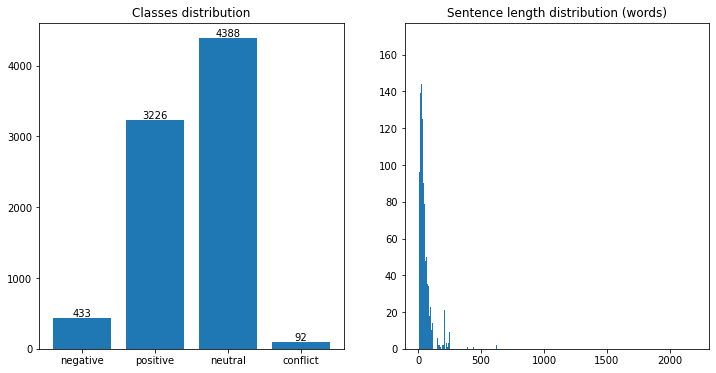

In [ ]:
from loader.load_tbsa import get_examples, Upsampling
from collections import Counter
import matplotlib.pyplot as plt

upsampling = Upsampling('negative', 1)
examples = get_examples("../data/FMCG/ver0.3/split/TBSA/all_tbsa.json", get_conflict= True, upsampling= upsampling)
print("Number of examples:",len(examples))

sentiments = []
sentence_length = []
for example in examples:
    sentiments.append(example.label)
    sentence_length.append(len(example.tokens))

sentiments = Counter(sentiments)
sentence_length = Counter(sentence_length)

fig, axs = plt.subplots(1,2, figsize= [12, 6])
bar1= axs[0].bar(sentiments.keys(), sentiments.values())
bar2= axs[1].bar(sentence_length.keys(), sentence_length.values())
for rect in bar1:
    height = rect.get_height()
    axs[0].text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom')

axs[0].title.set_text("Classes distribution")
axs[1].title.set_text("Sentence length distribution (words)")
plt.show()

Tokens: ['\u200d', '️', 'Một_số', 'nhưng', 'lưu_ý', 'nhỏ', 'nhưng', 'rất', 'hữu_ích', 'sau', 'đây', 'sẽ', 'là', 'bí_quyết', 'không_thể', 'thiếu', 'cho', 'một', 'chiếc', 'áo', 'cotton', 'bền_màu', 'và', 'lúc_nào', 'cũng', 'như', 'mới', '.', '1', '️', '⃣', 'Nên', 'giặt', 'áo', 'ngay', 'sau', 'khi', 'sử_dụng', 'để', 'tránh', 'áo', 'bị', 'ẩm', 'mốc', 'và', 'có', 'mùi', 'hôi', '.', '2', '️', '⃣', 'Không', 'nên', 'giặt', 'chung', 'áo', 'với', 'các', 'màu', 'áo', 'khác', 'nhất', 'là', 'giặt', 'với', 'các', 'loại', 'áo_phông', 'màu', 'đậm', '3', '️', '⃣', 'Hạn_chế', 'sử_dụng', 'các', 'loại', 'xà_phòng_giặt', 'tẩy', 'mạnh', ',', 'tuyệt_đối', 'không', 'dùng', 'thuốc_tẩy', ',', 'nhất_là', 'trên', 'áo', 'màu', '.', '4', '️', '⃣', 'Không', 'nên', 'giặt', 'áo', 'trong', 'nước', 'nóng', 'quá', '40', 'độ', ',', 'bởi', 'nước', 'nóng', 'có_thể', 'làm', 'vải', 'bị', 'giãn', 'ra', 'và', 'làm', 'mất', 'đi', 'phom', 'dáng', 'ban_đầu', '5', '️', '⃣', 'Tránh', 'sử_dụng', 'các', 'loại', 'nước_xả', 'làm', 'mềm'

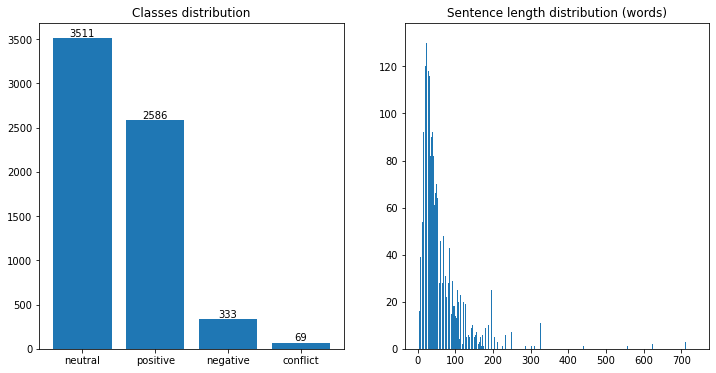

In [ ]:
from loader.load_tbsa import get_examples, Upsampling
from collections import Counter, OrderedDict
import matplotlib.pyplot as plt

upsampling = Upsampling('negative', 1)
examples = get_examples("../data/FMCG/ver0.3/split/TBSA/train.json", get_conflict= True, upsampling= upsampling)
print("Number of examples:",len(examples))

sentiments = []
sentence_length = []
for example in examples:
    sentiments.append(example.label)
    sentence_length.append(len(example.tokens))

sentiments = Counter(sentiments)
sentiments = OrderedDict(sentiments.most_common())
sentence_length = Counter(sentence_length)

fig, axs = plt.subplots(1,2, figsize= [12, 6])
bar1= axs[0].bar(sentiments.keys(), sentiments.values())
bar2= axs[1].bar(sentence_length.keys(), sentence_length.values())
for rect in bar1:
    height = rect.get_height()
    axs[0].text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom')

axs[0].title.set_text("Classes distribution")
axs[1].title.set_text("Sentence length distribution (words)")
plt.show()

In [ ]:
import math
print([math.log(6499/2586), 
      math.log(6499/3511), 
      math.log(6499/333), 
      math.log(6499/69)])

[0.9215360385625462, 0.6157474217259167, 2.971261107913905, 4.54529709329709]


Tokens: ['Trong', 'một_số', 'trường_hợp', ',', 'tác_nhân', 'gây', 'ra', 'gàu', 'được', 'xác_định', 'là', 'do', 'nấm', 'hoặc', 'do', 'da_đầu', 'bị', 'kích', 'ứng', 'sở_hữu', 'những', 'sản_phẩm', 'như', 'dầu_gội_đầu', ',', 'thuốc_tạo_kiểu_tóc', '…']
Term: dầu_gội_đầu
Position: [23]
Sentiment: negative
Number of examples: 825


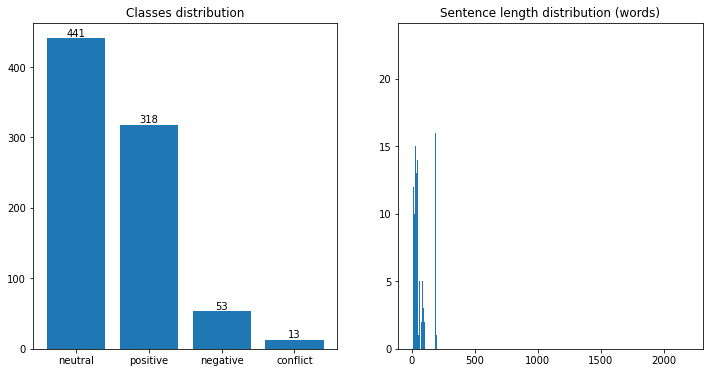

In [ ]:
from loader.load_tbsa import get_examples, Upsampling
from collections import Counter
import matplotlib.pyplot as plt

upsampling = Upsampling('negative', 1)
examples = get_examples("../data/FMCG/ver0.3/split/TBSA/dev.json", get_conflict= True, upsampling= upsampling)
print("Number of examples:",len(examples))

sentiments = []
sentence_length = []
for example in examples:
    sentiments.append(example.label)
    sentence_length.append(len(example.tokens))

sentiments = Counter(sentiments)
sentiments = OrderedDict(sentiments.most_common())
sentence_length = Counter(sentence_length)

fig, axs = plt.subplots(1,2, figsize= [12, 6])
bar1= axs[0].bar(sentiments.keys(), sentiments.values())
bar2= axs[1].bar(sentence_length.keys(), sentence_length.values())
for rect in bar1:
    height = rect.get_height()
    axs[0].text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom')

axs[0].title.set_text("Classes distribution")
axs[1].title.set_text("Sentence length distribution (words)")
plt.show()

Tokens: ['Làm', 'sạch', 'da', 'sâu', 'Để', 'bù_đắp', 'nhược_điểm', 'của', 'sữa_rửa_mặt', ',', 'không', 'giúp', 'làm', 'sạch', 'da', 'sâu', 'thì', '.']
Term: sữa_rửa_mặt
Position: [8]
Sentiment: negative
Number of examples: 815


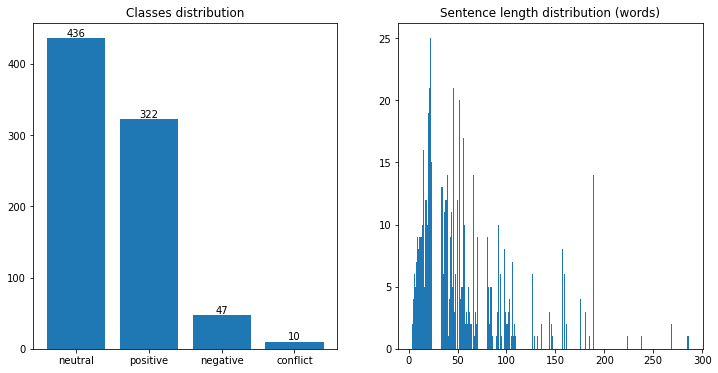

In [ ]:
from loader.load_tbsa import get_examples, Upsampling
from collections import Counter
import matplotlib.pyplot as plt

upsampling = Upsampling('negative', 1)
examples = get_examples("../data/FMCG/ver0.3/split/TBSA/test.json", get_conflict= True, upsampling= upsampling)
print("Number of examples:",len(examples))

sentiments = []
sentence_length = []
for example in examples:
    sentiments.append(example.label)
    sentence_length.append(len(example.tokens))

sentiments = Counter(sentiments)
sentiments = OrderedDict(sentiments.most_common())
sentence_length = Counter(sentence_length)

fig, axs = plt.subplots(1,2, figsize= [12, 6])
bar1= axs[0].bar(sentiments.keys(), sentiments.values())
bar2= axs[1].bar(sentence_length.keys(), sentence_length.values())
for rect in bar1:
    height = rect.get_height()
    axs[0].text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom')

axs[0].title.set_text("Classes distribution")
axs[1].title.set_text("Sentence length distribution (words)")
plt.show()

In [ ]:
# Test load data

In [ ]:
from transformers import PhobertTokenizer
from loader.load_tbsa import *
tokenizer = PhobertTokenizer.from_pretrained("vinai/phobert-base")
tokenizer.do_lower_case = True
seq_max_len = 256
examples = get_examples("../data/FMCG/ver0.3/split/TBSA/all_tbsa.json")
data = convert_examples_to_dataset(examples, label_dict, seq_max_len, tokenizer, stride= 4)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Number of all terms: 10023
Number of distinct term: 8047


### F&B

In [ ]:
!python3 loader/split_data_tbsa.py --data_file ../data/FandB/ver0.1/clean_data_wseg20.json --save_folder ../data/FandB/ver0.1/split/TBSA/

Term with no attribute: 0
All sentences: 4827
Train: 3860 || Dev: 482 || Test: 485


Number of examples: 11472


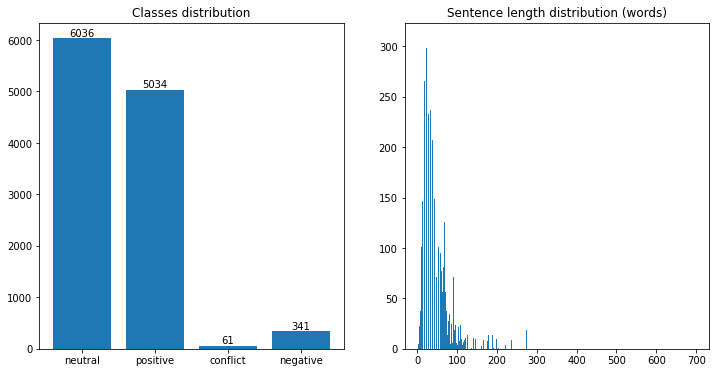

In [ ]:
from loader.load_tbsa import get_examples, Upsampling
from collections import Counter
import matplotlib.pyplot as plt

upsampling = Upsampling('negative', 1)
examples = get_examples("../data/FandB/ver0.1/split/TBSA/all_tbsa.json", get_conflict= True, upsampling= upsampling)
print("Number of examples:",len(examples))

sentiments = []
sentence_length = []
for example in examples:
    sentiments.append(example.label)
    sentence_length.append(len(example.tokens))

sentiments = Counter(sentiments)
sentence_length = Counter(sentence_length)

fig, axs = plt.subplots(1,2, figsize= [12, 6])
bar1= axs[0].bar(sentiments.keys(), sentiments.values())
bar2= axs[1].bar(sentence_length.keys(), sentence_length.values())
for rect in bar1:
    height = rect.get_height()
    axs[0].text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom')

axs[0].title.set_text("Classes distribution")
axs[1].title.set_text("Sentence length distribution (words)")
plt.show()

Number of examples: 9210


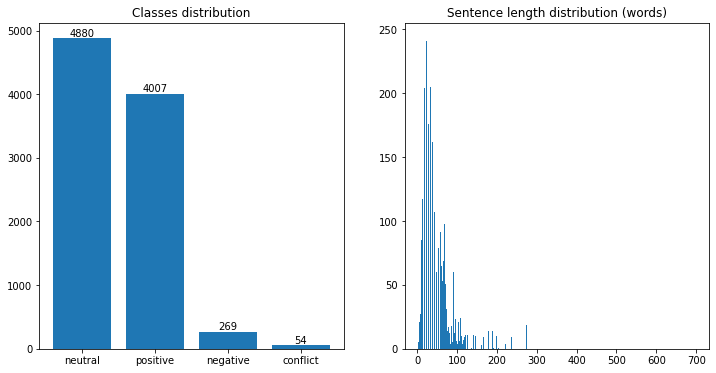

In [ ]:
from loader.load_tbsa import get_examples, Upsampling
from collections import Counter, OrderedDict
import matplotlib.pyplot as plt

upsampling = Upsampling('negative', 1)
examples = get_examples("../data/FandB/ver0.1/split/TBSA/train.json", get_conflict= True, upsampling= upsampling)
print("Number of examples:",len(examples))

sentiments = []
sentence_length = []
for example in examples:
    sentiments.append(example.label)
    sentence_length.append(len(example.tokens))

sentiments = Counter(sentiments)
sentiments = OrderedDict(sentiments.most_common())
sentence_length = Counter(sentence_length)

fig, axs = plt.subplots(1,2, figsize= [12, 6])
bar1= axs[0].bar(sentiments.keys(), sentiments.values())
bar2= axs[1].bar(sentence_length.keys(), sentence_length.values())
for rect in bar1:
    height = rect.get_height()
    axs[0].text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom')

axs[0].title.set_text("Classes distribution")
axs[1].title.set_text("Sentence length distribution (words)")
plt.show()

Number of examples: 1128


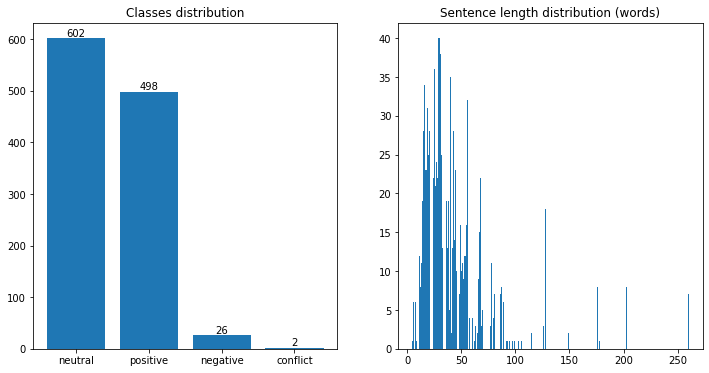

In [ ]:
from loader.load_tbsa import get_examples, Upsampling
from collections import Counter, OrderedDict
import matplotlib.pyplot as plt

examples = get_examples("../data/FandB/ver0.1/split/TBSA/dev.json", get_conflict= True, upsampling= upsampling)
print("Number of examples:",len(examples))

sentiments = []
sentence_length = []
for example in examples:
    sentiments.append(example.label)
    sentence_length.append(len(example.tokens))

sentiments = Counter(sentiments)
sentiments = OrderedDict(sentiments.most_common())
sentence_length = Counter(sentence_length)

fig, axs = plt.subplots(1,2, figsize= [12, 6])
bar1= axs[0].bar(sentiments.keys(), sentiments.values())
bar2= axs[1].bar(sentence_length.keys(), sentence_length.values())
for rect in bar1:
    height = rect.get_height()
    axs[0].text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom')

axs[0].title.set_text("Classes distribution")
axs[1].title.set_text("Sentence length distribution (words)")
plt.show()

Number of examples: 1168


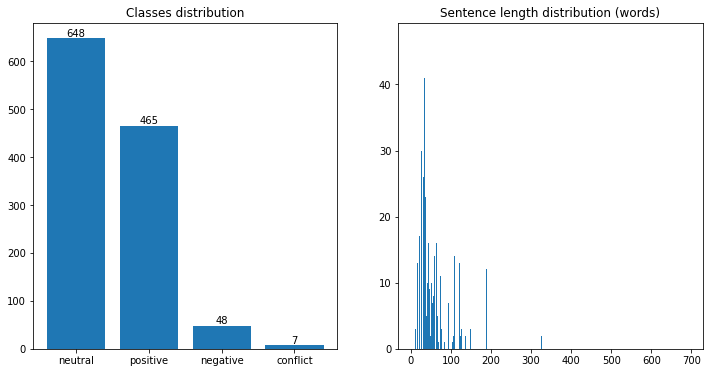

In [ ]:
from loader.load_tbsa import get_examples, Upsampling
from collections import Counter, OrderedDict
import matplotlib.pyplot as plt

examples = get_examples("../data/FandB/ver0.1/split/TBSA/test.json", get_conflict= True, upsampling= upsampling)
print("Number of examples:",len(examples))

sentiments = []
sentence_length = []
for example in examples:
    sentiments.append(example.label)
    sentence_length.append(len(example.tokens))

sentiments = Counter(sentiments)
sentiments = OrderedDict(sentiments.most_common())
sentence_length = Counter(sentence_length)

fig, axs = plt.subplots(1,2, figsize= [12, 6])
bar1= axs[0].bar(sentiments.keys(), sentiments.values())
bar2= axs[1].bar(sentence_length.keys(), sentence_length.values())
for rect in bar1:
    height = rect.get_height()
    axs[0].text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom')

axs[0].title.set_text("Classes distribution")
axs[1].title.set_text("Sentence length distribution (words)")
plt.show()

In [ ]:
from transformers import PhobertTokenizer
from loader.load_tbsa import *
tokenizer = PhobertTokenizer.from_pretrained("vinai/phobert-base")
tokenizer.do_lower_case = True
seq_max_len = 256
examples = get_examples("../data/FandB/ver0.1/split/TBSA/all_tbsa.json")
data = convert_examples_to_dataset(examples, label_dict, seq_max_len, tokenizer, stride= 4)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


1 2
[0, 2067, 1690, 3820, 2106, 18233, 21931, 9835, 4561, 1395, 6525, 189, 352, 73, 109, 939, 17, 10042, 1019, 11383, 37072, 1395, 6525, 189, 142, 553, 1995, 2105, 2615, 5375, 1395, 6525, 189, 142, 1269, 2400, 2105, 2615, 5375, 1395, 6525, 189, 142, 10815, 42, 1164, 4864, 4443, 9225, 1395, 6525, 2756, 3253, 7, 7854, 3520, 6037, 5130, 1395, 6525, 2756, 3253, 7, 10209, 31944, 3531, 14404, 1395, 6525, 2756, 3253, 191, 26301, 56679, 54922, 11383, 37072, 1395, 6525, 6709, 2640, 22563, 2057, 10601, 1395, 6525, 6709, 6, 27168, 1362, 10317, 2765, 1395, 6525, 12821, 3270, 25727, 19659, 52, 3945, 215, 76, 834, 1395, 6525, 401, 16191, 181, 40976, 23520, 7, 70, 2615, 7176, 7075, 1395, 6525, 55241, 109, 25225, 133, 542, 10189, 1395, 6525, 1439, 1430, 64000, 3497, 30, 12047, 2849, 1269, 1395, 6525, 1595, 29946, 3931, 21206, 1778, 36522, 7771, 29946, 3931, 25964, 51196, 25615, 2037, 17064, 56269, 31636, 397, 19235, 811, 7606, 46, 286, 8, 24893, 3884, 542, 8846, 46, 176, 83, 8, 277, 5237, 1776, 2648, 

## ACSA

### FMCG

In [ ]:
!python3 loader/split_data_acsa.py --data_file ../data/FMCG/ver0.3/clean_data_wseg20.json --save_folder ../data/FMCG/ver0.3/split/ACSA/

Term with no attribute: 0
All sentences: 4715
Train: 3771 || Dev: 470 || Test: 474


In [ ]:
from loader.load_acd_acsa import aspect_type_dict, aspect_sentiment_dict
def cate_stastistic(filename):
    cate_dict = {}
    for aspect_type in aspect_type_dict:
        cate_dict[aspect_type] = {}
        for sentiment in aspect_sentiment_dict:
            cate_dict[aspect_type][sentiment] = 0
    with open(filename, "r") as f:
        data = json.load(f)["data"]
    for sentence in data:
        for term_id in sentence['terms']:
            for attribute in sentence['terms'][term_id]['attribute']:
                cate_dict[attribute[0]][attribute[1]] += 1
    return cate_dict

In [ ]:
import os, json

all_data_statistic = cate_stastistic("../data/FMCG/ver0.3/split/ACSA/all_acsa.json")
train_statistic = cate_stastistic("../data/FMCG/ver0.3/split/ACSA/train.json")
dev_statistic = cate_stastistic("../data/FMCG/ver0.3/split/ACSA/dev.json")
test_statistic = cate_stastistic("../data/FMCG/ver0.3/split/ACSA/test.json")

# print(json.dumps(all_data_statistic, indent = 4))
# print(json.dumps(train_statistic, indent = 4))
# print(json.dumps(dev_statistic, indent = 4))
# print(json.dumps(test_statistic, indent = 4))

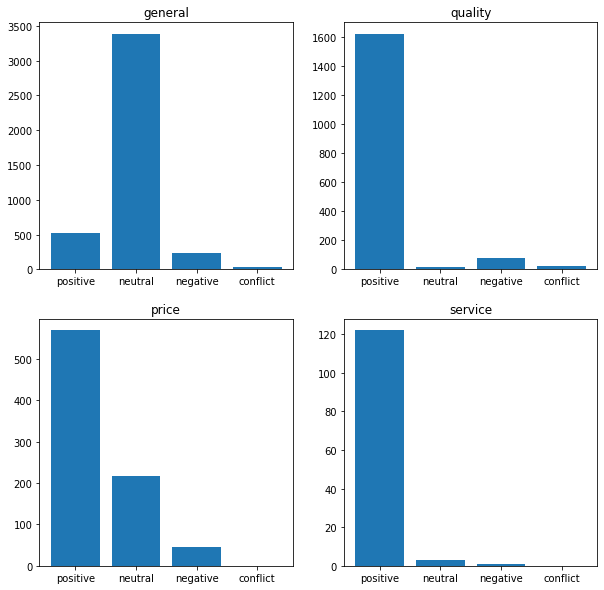

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,2,figsize= (10,10))
for i, aspect_type in enumerate(train_statistic):
    train_statistic[aspect_type].pop("None")
    keys = train_statistic[aspect_type].keys()
    values = train_statistic[aspect_type].values()
    axs[i//2][i%2].bar(keys, values)
    axs[i//2][i%2].title.set_text(aspect_type)

plt.show()

In [ ]:
from loader.load_acd_acsa import get_examples, convert_examples_to_dataset, aspect_type_dict, aspect_sentiment_dict
from transformers import PhobertTokenizer
tokenizer = PhobertTokenizer.from_pretrained("vinai/phobert-base")
tokenizer.do_lower_case = True
examples = get_examples("../data/FMCG/ver0.3/split/ACSA/all_acsa.json", get_conflict= False)
features = convert_examples_to_dataset(examples, aspect_type_dict, aspect_sentiment_dict, 256, tokenizer, 4, True)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


[0, 183, 17, 543, 117, 64000, 4, 852, 24, 729, 68, 2023, 661, 1124, 4, 1984, 167, 67, 77, 175, 10070, 1600, 15021, 2914, 151, 2023, 1602, 1471, 5, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
['<s>', 'nếu', 'không', 'thích', 'sử_dụng', '<mask>', ',', 'hãy', 'để', 'cơ_thể', 'mình', 'thơm', 'một_cách', 'tự_nhiên', ',', 'quần_áo', 'tốt', 'nhất', 'nên', 'dùng', 'nướ

### F&B

In [ ]:
!python3 loader/split_data_acsa.py --data_file ../data/FandB/ver0.1/clean_data_wseg20.json --save_folder ../data/FandB/ver0.1/split/ACSA/

Term with no attribute: 0
All sentences: 4827
Train: 3861 || Dev: 482 || Test: 484


In [ ]:
from loader.load_acd_acsa import aspect_type_dict, aspect_sentiment_dict
def cate_stastistic(filename):
    cate_dict = {}
    for aspect_type in aspect_type_dict:
        cate_dict[aspect_type] = {}
        for sentiment in aspect_sentiment_dict:
            cate_dict[aspect_type][sentiment] = 0
    with open(filename, "r") as f:
        data = json.load(f)["data"]
    for sentence in data:
        for term_id in sentence['terms']:
            for attribute in sentence['terms'][term_id]['attribute']:
                cate_dict[attribute[0]][attribute[1]] += 1
    return cate_dict

In [ ]:
import os, json

all_data_statistic = cate_stastistic("../data/FandB/ver0.1/split/ACSA/all_acsa.json")
train_statistic = cate_stastistic("../data/FandB/ver0.1/split/ACSA/train.json")
dev_statistic = cate_stastistic("../data/FandB/ver0.1/split/ACSA/dev.json")
test_statistic = cate_stastistic("../data/FandB/ver0.1/split/ACSA/test.json")

# print(json.dumps(all_data_statistic, indent = 4))
# print(json.dumps(train_statistic, indent = 4))
# print(json.dumps(dev_statistic, indent = 4))
# print(json.dumps(test_statistic, indent = 4))

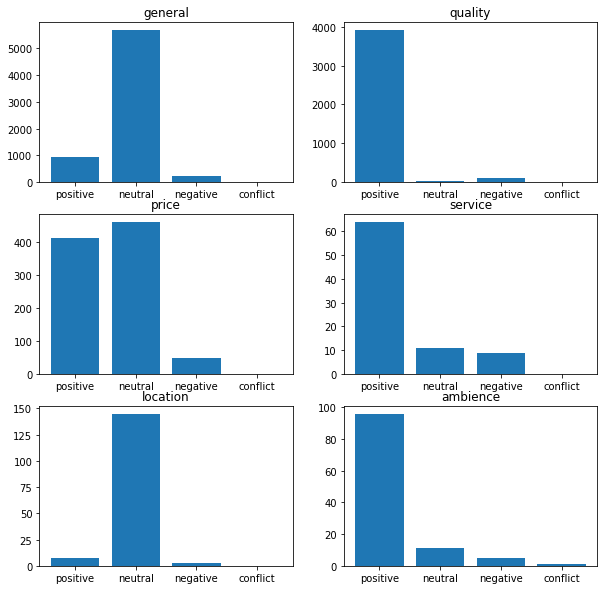

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3,2,figsize= (10,10))
for i, aspect_type in enumerate(all_data_statistic):
    all_data_statistic[aspect_type].pop("None")
    keys = all_data_statistic[aspect_type].keys()
    values = all_data_statistic[aspect_type].values()
    axs[i//2][i%2].bar(keys, values)
    axs[i//2][i%2].title.set_text(aspect_type)

plt.show()

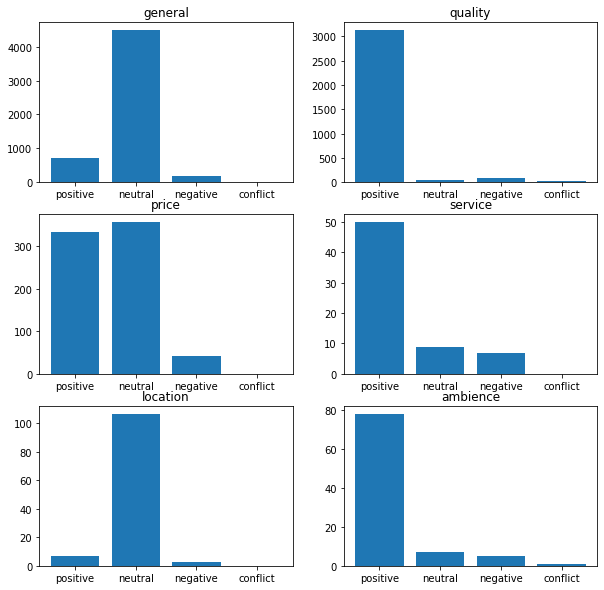

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3,2,figsize= (10,10))
for i, aspect_type in enumerate(train_statistic):
    train_statistic[aspect_type].pop("None")
    keys = train_statistic[aspect_type].keys()
    values = train_statistic[aspect_type].values()
    axs[i//2][i%2].bar(keys, values)
    axs[i//2][i%2].title.set_text(aspect_type)

plt.show()

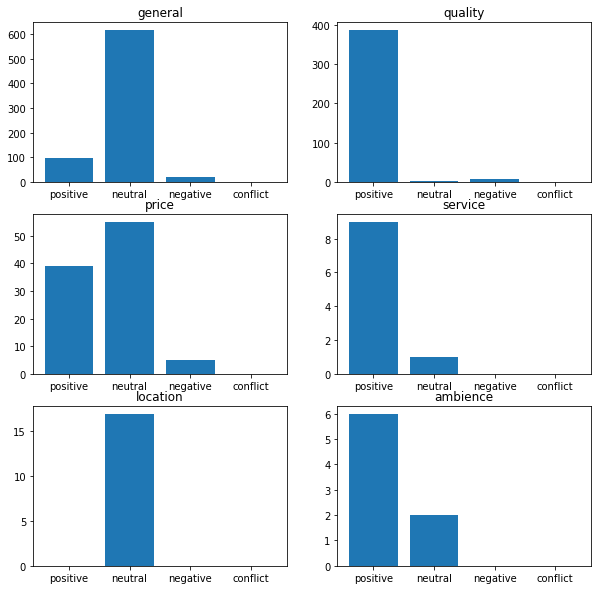

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3,2,figsize= (10,10))
for i, aspect_type in enumerate(dev_statistic):
    dev_statistic[aspect_type].pop("None")
    keys = dev_statistic[aspect_type].keys()
    values = dev_statistic[aspect_type].values()
    axs[i//2][i%2].bar(keys, values)
    axs[i//2][i%2].title.set_text(aspect_type)

plt.show()

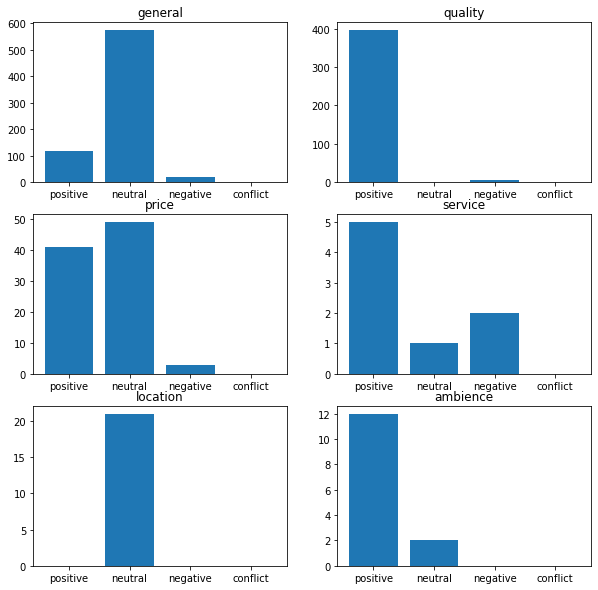

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3,2,figsize= (10,10))
for i, aspect_type in enumerate(test_statistic):
    test_statistic[aspect_type].pop("None")
    keys = test_statistic[aspect_type].keys()
    values = test_statistic[aspect_type].values()
    axs[i//2][i%2].bar(keys, values)
    axs[i//2][i%2].title.set_text(aspect_type)

plt.show()

In [ ]:
from loader.load_acd_acsa import get_examples, convert_examples_to_dataset, aspect_type_dict, aspect_sentiment_dict
from transformers import PhobertTokenizer
tokenizer = PhobertTokenizer.from_pretrained("vinai/phobert-base")
tokenizer.do_lower_case = True
examples = get_examples("../data/FandB/ver0.1/split/ACSA/all_acsa.json", get_conflict= False)
features = convert_examples_to_dataset(examples, aspect_type_dict, aspect_sentiment_dict, 256, tokenizer, 4, True)

# Test model

In [ ]:
!python3 ./run_tbsa.py \
      --approach phobert \
      --data_dir ../data/FandB/ver0.1/split/TBSA \
      --max_length 256 \
      --stride 4 \
      --epochs 10 \
      --pool_type sum \
      --lr 2e-5 \
      --gradient_accumulation_steps 2 \
      --do_lower_case \
      --replace_term_with_mask \
      --train_batch_size 16 \
      --test_batch_size 8 \
      --imb_weight \
      --device cuda:0

In [ ]:
!python3 ./run_acd_acsa.py \
          --approach phobert \
          --data_dir ../data/FandB/ver0.1/split/ACSA \
          --max_length 256 \
          --stride 4 \
          --epochs 10 \
          --pool_type sum \
          --lr 2e-5 \
          --gradient_accumulation_steps 2 \
          --do_lower_case \
          --replace_term_with_mask \
          --train_batch_size 16 \
          --test_batch_size 8 \
          --device cuda:0

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaModel: ['lm_head.decoder.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Loading data ...
Load training data ...
[0, 64000, 2065, 1195, 2162, 2677, 1347, 19045, 7274, 232, 170, 245, 1664, 1443, 1664, 32, 156, 4088, 64000, 

In [ ]:
!python3 predict_tbsa.py \
        --approach phobert_mixlayer \
        --model_path ../saved_model/FMCG/TBSA/phobert_mixlayer_seed_21_num_classes_3_max_length_256_stride_4_epochs_10_data_mode_single_pool_type_sum_lr_3e-05_weight_decay_0.001_do_lower_case_True_replace_term_with_mask_True_imb_weight_True_mix_count_4_mix_type_HSUM_train_batch_size_8.pt \
        --predict_file ../ABSA_old/data/FMCG/ver0.3/split/TBSA/test.json \
        --device cuda:0 \
        --max_length 256 \
        --stride 4 \
        --pool_type sum \
        --do_lower_case \
        --replace_term_with_mask \
        --test_batch_size 16 \
        --mix_count 4 \
        --imb_weight \
        --mix_type HSUM

Arguments:
	approach: phobert_mixlayer
	data_mode: single
	device: cuda:0
	do_lower_case: True
	get_conflict: False
	imb_weight: True
	label_dict: {'positive': 0, 'neutral': 1, 'negative': 2}
	label_weights: [0.9215360385625462, 0.6157474217259167, 2.971261107913905]
	max_length: 256
	mix_count: 4
	mix_type: HSUM
	model_path: ../saved_model/FMCG/TBSA/phobert_mixlayer_seed_21_num_classes_3_max_length_256_stride_4_epochs_10_data_mode_single_pool_type_sum_lr_3e-05_weight_decay_0.001_do_lower_case_True_replace_term_with_mask_True_imb_weight_True_mix_count_4_mix_type_HSUM_train_batch_size_8.pt
	n_gpu: 1
	num_classes: 3
	pool_type: sum
	predict_file: ../ABSA_old/data/FMCG/ver0.3/split/TBSA/test.json
	print_model_info: False
	replace_term_with_mask: True
	seed: 21
	stride: 4
	task: TBSA
	test_batch_size: 16
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Some weights of the model checkpoint at vinai/phobert-base were not us

In [ ]:
!python3 predict_acd_acsa.py \
        --approach phobert \
        --model_path ../saved_model/FMCG/ACD_ACSA/phobert_seed_21_num_classes_4_max_length_256_stride_4_epochs_10_data_mode_single_pool_type_max_lr_2e-05_weight_decay_0.001_do_lower_case_True_replace_term_with_mask_True_imb_weight_False_train_batch_size_8_test_batch_size_8.pt \
        --predict_file ../ABSA_old/data/FMCG/ver0.3/split/ACSA/test.json \
        --device cuda:0 \
        --max_length 256 \
        --stride 4 \
        --pool_type max \
        --do_lower_case \
        --replace_term_with_mask \
        --test_batch_size 16 \

Arguments:
	approach: phobert
	aspect_sentiment_dict: {'None': 0, 'positive': 1, 'neutral': 2, 'negative': 3}
	aspect_type_dict: {'general': 0, 'quality': 1, 'price': 2, 'service': 3}
	data_mode: single
	device: cuda:0
	do_lower_case: True
	get_conflict: False
	imb_weight: False
	label_weights: tensor([1., 1., 1., 1.], device='cuda:0')
	max_length: 256
	mix_count: 3
	mix_type: HSUM
	model_path: ../saved_model/FMCG/ACD_ACSA/phobert_seed_21_num_classes_4_max_length_256_stride_4_epochs_10_data_mode_single_pool_type_max_lr_2e-05_weight_decay_0.001_do_lower_case_True_replace_term_with_mask_True_imb_weight_False_train_batch_size_8_test_batch_size_8.pt
	n_gpu: 1
	num_classes: 4
	pool_type: max
	predict_file: ../ABSA_old/data/FMCG/ver0.3/split/ACSA/test.json
	print_model_info: False
	replace_term_with_mask: True
	seed: 21
	stride: 4
	task: ACD_ACSA
	test_batch_size: 16
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Some wei